# Chapter 1 - Time Series Concepts and Python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PythonTsa.plot_acf_pacf import acf_pacf_fig
from statsmodels.tsa.stattools import adfuller
from numpy import random
from numpy.random import normal

In [3]:
#plt.rcParams['figure.figsize'] = (10, 6)

## Bitcoin Price Time Series

In [5]:
bitcoin = pd.read_excel('data/BitcoinPrice17-6-23-18-6-22.xlsx', header = 0)

dat = pd.date_range('2017 06 23', periods = len(bitcoin),freq = 'D')
bitcoin.index = dat

bitcoin.head()

,Time,ClosingP,OpenP,High,Low,Volume,Rate
2017-06-23,42909,2674.9,2672.8,2725.3,2652.8,8.14K,0.0008
2017-06-24,42910,2502.6,2674.9,2700.0,2454.1,16.77K,-0.0644
2017-06-25,42911,2477.7,2502.6,2595.0,2369.1,18.13K,-0.0099
2017-06-26,42912,2394.6,2480.0,2510.4,2258.7,36.37K,-0.0335
2017-06-27,42913,2521.2,2393.5,2524.0,2208.1,33.49K,0.0529


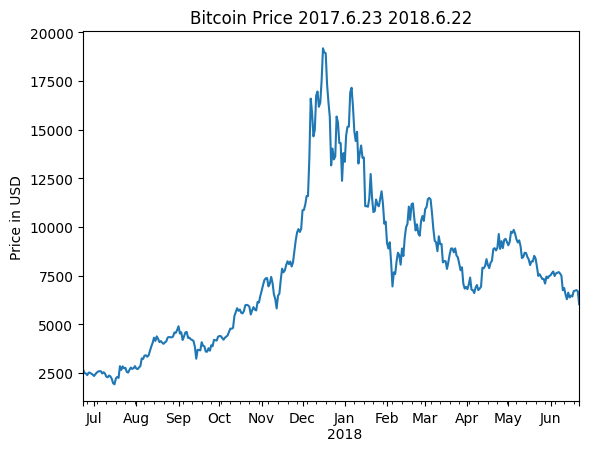

In [6]:
price = bitcoin['ClosingP']

price.plot() 
plt.title('Bitcoin Price 2017.6.23 2018.6.22')
plt.ylabel('Price in USD'); 

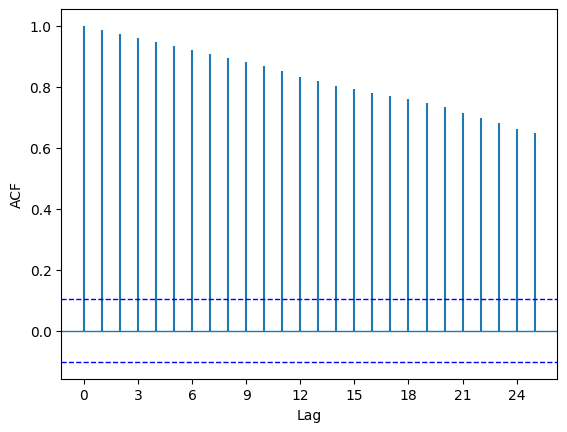

In [7]:
acf_pacf_fig(price, lag = 25)

In [8]:
from statsmodels.tsa.stattools import adfuller

# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(price)

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: -1.7346684400931802
p-value: 0.4133445451493137

p-value > alpha; H0: Not Stationary


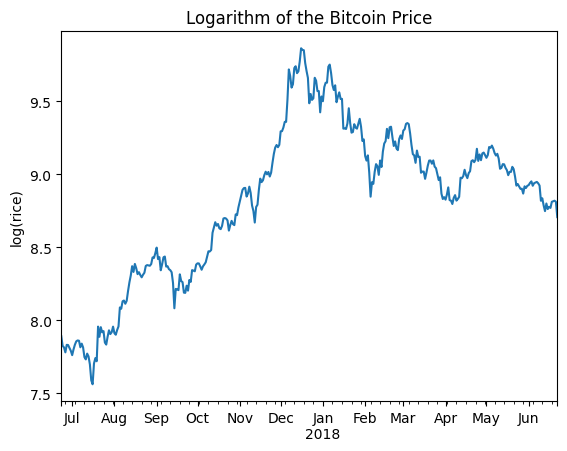

In [9]:
logp = np.log(price)

logp.plot()
plt.title('Logarithm of the Bitcoin Price')
plt.ylabel('log(rice)');

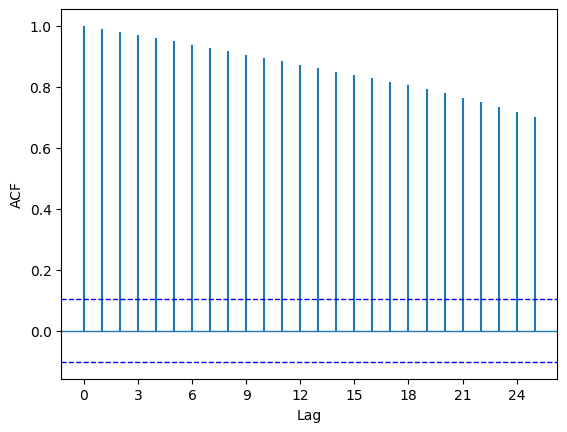

In [10]:
acf_pacf_fig(logp, lag = 25)

In [11]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(logp)

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: -1.7368766187738736
p-value: 0.412219630480269

p-value > alpha; H0: Not Stationary


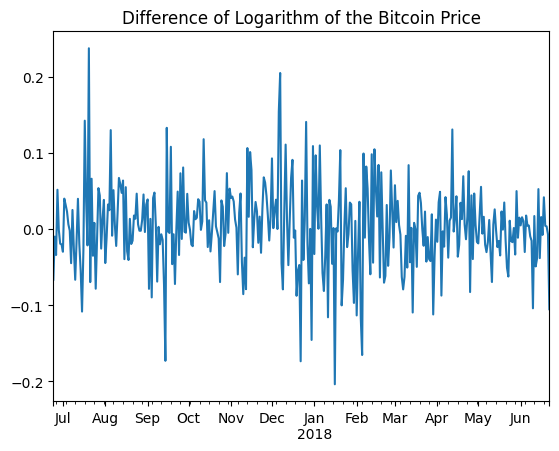

In [12]:
difflogp = logp.diff(1)
difflogp = difflogp.dropna() #delete "NaN"
difflogp.plot()
plt.title('Difference of Logarithm of the Bitcoin Price');

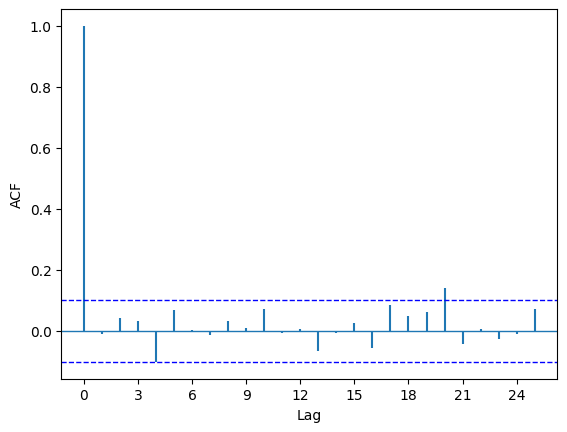

In [13]:
acf_pacf_fig(difflogp, lag = 25)

In [14]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(difflogp)

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: -19.162398425253702
p-value: 0.0

p-value < alpha; Ha: Stationary


    data -> log(data) -> diff(log(data))

## Chinese Quarterly GDP

In [17]:
from PythonTsa.datadir import getdtapath

In [18]:
x=pd.read_csv('data/gdpquarterlychina1992.1-2017.4.csv',header=0)

dates = pd.date_range(start='1992',periods=len(x),freq='QE')

x.index=dates

x.head()

,GDP
1992-03-31,5234.8
1992-06-30,6536.8
1992-09-30,7122.5
1992-12-31,8174.3
1993-03-31,6803.1


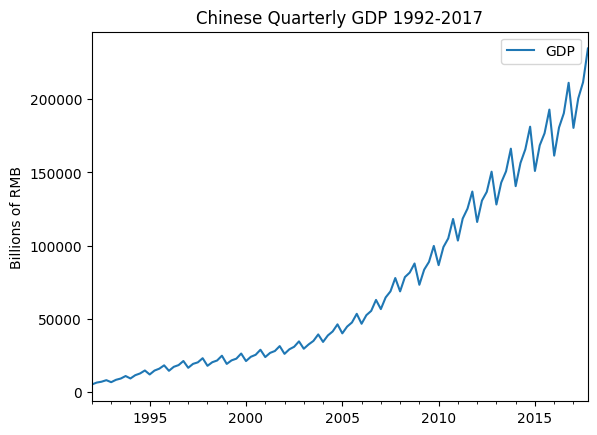

In [19]:
x.plot(); plt.title('Chinese Quarterly GDP 1992-2017')
plt.ylabel('Billions of RMB')
plt.show()

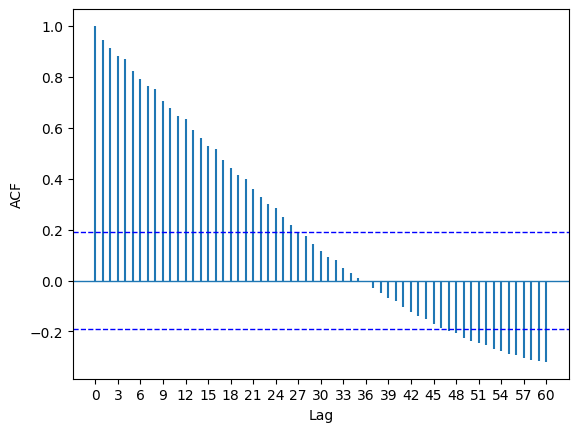

In [20]:
acf_pacf_fig(x, both=False, lag=60)

## White Noise

In [22]:
random.seed(135) # for repeat

wn=random.normal(loc=0, scale=1, size=1000)

wns=pd.Series(wn)

wns

0     -1.264856
1      1.184281
2      0.355047
3     -0.297943
4     -0.533484
         ...   
995   -1.186525
996    0.042393
997   -0.198370
998    0.141927
999    0.087527
Length: 1000, dtype: float64

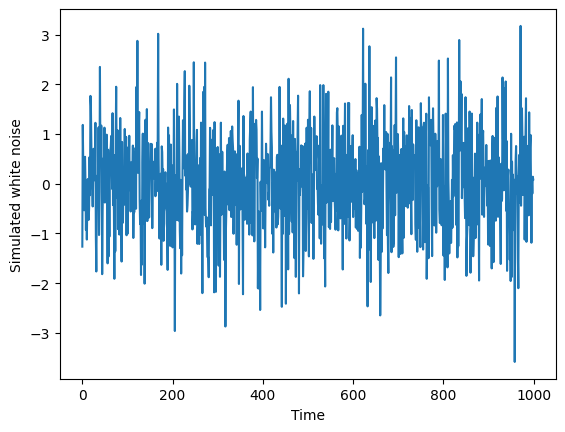

In [23]:
wns.plot()
plt.xlabel('Time')
plt.ylabel('Simulated white noise')
plt.show();

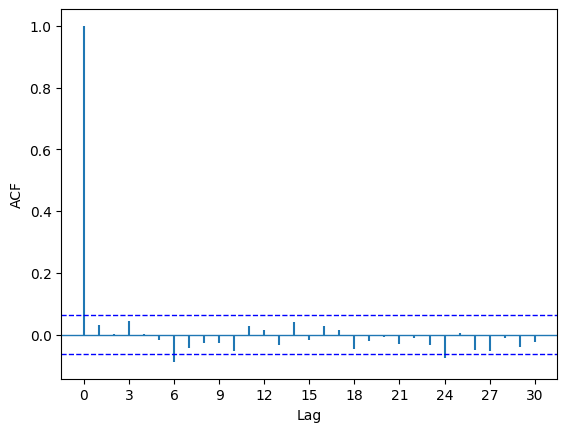

In [24]:
acf_pacf_fig(wns, both=False, lag=30)

In [25]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(wns)

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: -13.85813756270814
p-value: 6.807429055770371e-26

p-value < alpha; Ha: Stationary


## Equation:

$$
x_t = 4.0 \cdot x_{t-1} \cdot (1 - x_{t-1}), \quad x_0 \in (0, 1)
$$

In [27]:
x = pd.Series(dtype=float)  # Create an empty Series
y = 0.3                     # Start value

for t in range(1, 501):     # Loop over the time steps
    y = 4.0 * y * (1 - y)   # The logistic equation
    x.loc[t - 1] = y        # Assign the value to the Series at index t-1

# Set the index to be the range 1 to 500
x.index = range(1, 501)

# Now x is the series with the values from the iteration
x.head()

1    0.840000
2    0.537600
3    0.994345
4    0.022492
5    0.087945
dtype: float64

In [28]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(x)

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: -18.00597437184622
p-value: 2.7244510994322216e-30

p-value < alpha; Ha: Stationary


## Gaussian Random Walking

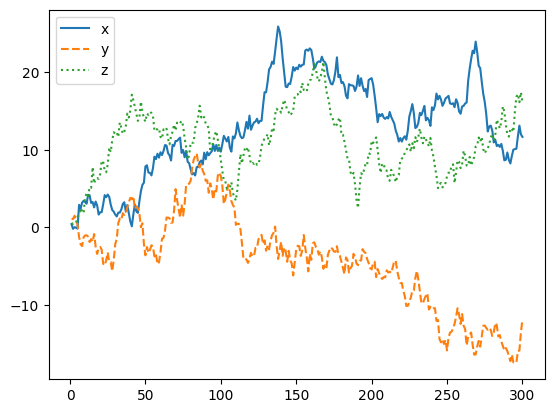

In [30]:
np.random.seed(1357)

a = normal(size=300)
b = normal(size=300)
c = normal(size=300)

x = np.cumsum(a)
y = np.cumsum(b)
z = np.cumsum(c)

xyz = pd.DataFrame({'x': x, 'y': y, 'z': z})
xyz.index=range(1,301)
xyz.plot(style=['-', '--', ':'])
plt.show();

In [31]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(y)

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: -1.2915713693313038
p-value: 0.6330195461632462

p-value > alpha; H0: Not Stationary
